In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('seaborn-bright')

In [2]:
#read in the data

year = 2020
df_rural = pd.read_csv(f'data/{year}_7rural.csv')
df_urban = pd.read_csv(f'data/{year}_7cities.csv')

In [5]:
# clean up: make column names consistent across the two tables
column_names = df_rural.columns.values
column_names[0] = 'Date'
column_names[7] = 'City'
df_rural.columns = column_names

# clean up: fix date column and filter so that just this year's data is included
df_rural.Date = pd.to_datetime(df_rural.Date, format = '%d/%m/%Y') # need the format string to specify which is the month and which is the year
df_rural['month_num'] = pd.DatetimeIndex(df_rural['Date']).month
df_rural['month_name'] = df_rural.Date.dt.month_name()
df_rural.dtypes

print(df_rural.shape)
# just keep this year's data, discard everything else
df_rural = df_rural[df_rural['Date'].dt.year == year]
print(df_rural.shape)

#Same for urban 
df_urban.Date = pd.to_datetime(df_urban.Date, format = '%d/%m/%Y') # need the format string to specify which is the month and which is the year
df_urban['month_num'] = pd.DatetimeIndex(df_urban['Date']).month
df_urban['month_name'] = df_urban.Date.dt.month_name()
df_urban.dtypes
print(df_urban.shape)
# just keep this year's data, discard everything else
df_urban = df_urban[df_urban['Date'].dt.year == year]
print(df_urban.shape)

(1040, 10)
(1040, 10)
(7601, 12)
(7518, 12)


In [9]:
urban = df_urban.City.unique()
pollutants = df_urban.Specie.unique()

rural = df_rural.City.unique()

print("urban areas: ", urban)
print("rural areas: ", rural)
print("pollutants:  ", pollutants)

## 24-hour means unless otherwise specified. Using 8-hour as a proxy when unavailable
pollutant_who = {}
pollutant_who['co']   = 0
pollutant_who['no2']  = 0
pollutant_who['o3']   = 100 ##  8-hour mean
pollutant_who['pm10'] = 50
pollutant_who['pm25'] = 25
pollutant_who['so2']  = 20  

## annual in 'industrial, residential, rural, others' areas
pollutant_naaqs = {}
pollutant_naaqs['co']   = 2   ##  8-hour mean
pollutant_naaqs['no2']  = 80
pollutant_naaqs['o3']   = 100 ##  8-hour mean
pollutant_naaqs['pm10'] = 100
pollutant_naaqs['pm25'] = 60
pollutant_naaqs['so2']  = 80  

urban areas:  ['Hyderabad' 'Delhi' 'Chennai' 'Visakhapatnam' 'Mumbai' 'Bengaluru'
 'Kolkata']
rural areas:  ['coimbatore' 'guwahati' 'jabalpur' 'kota' 'mussoorie' 'vapi']
pollutants:   ['no2' 'pm25' 'pm10' 'o3' 'so2' 'co']


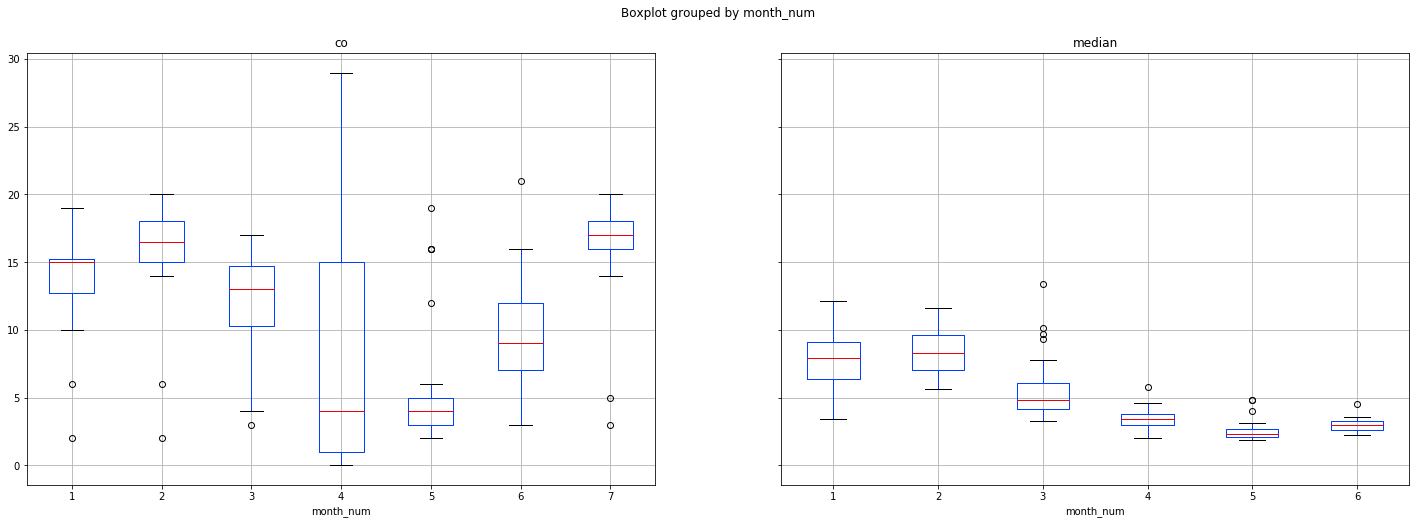

In [33]:
# Now we compare Vapi with Mumbai
df_vapi = df_rural[df_rural.City == 'vapi']
df_mumbai = df_urban[df_urban.City == 'Mumbai']

fig, ax = plt.subplots(1, 2, figsize=(24, 8), sharey='row')

p = pollutants[5]
df_vapi.boxplot(column=p, by='month_num', ax=ax[0])

df_mumbai[df_mumbai.Specie == p].boxplot(column='median', by='month_num', ax=ax[1])
plt.show()

In [20]:
df_vapi.head()
df_mumbai.head()

,Unnamed: 0,Date,Country,City,Specie,count,min,max,median,variance,month_num,month_name
4308,27793,2020-01-04,IN,Mumbai,no2,288,0.1,73.6,16.4,1720.73,1,January
4309,27794,2020-02-19,IN,Mumbai,no2,308,0.7,118.1,22.6,4280.95,2,February
4310,27795,2020-03-03,IN,Mumbai,no2,96,0.4,41.1,14.9,1248.10,3,March
4311,27796,2020-03-26,IN,Mumbai,no2,264,0.2,18.7,3.6,164.23,3,March
4312,27797,2020-04-12,IN,Mumbai,no2,209,0.5,42.7,2.4,172.85,4,April
